In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
# Loading the dataset
df = pd.read_csv("UpdatedResumeDataSet.csv")
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


## Exploratory Data Analysis(EDA)

In [3]:
category = df['Category'].value_counts().reset_index()
category.head()

,index,Category
0,Java Developer,84
1,Testing,70
2,DevOps Engineer,55
3,Python Developer,48
4,Web Designing,45


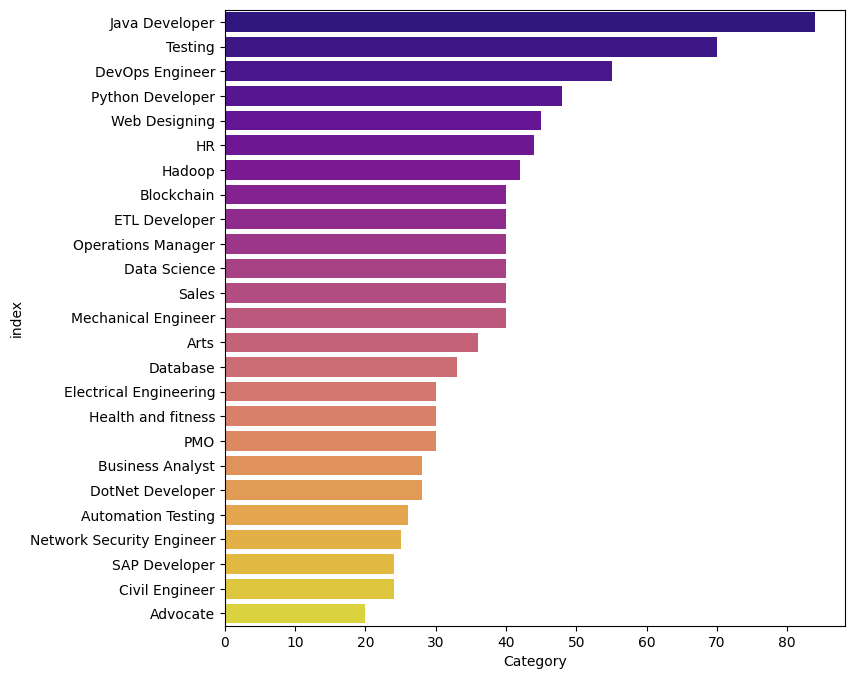

In [4]:
#barplot
plt.figure(figsize=(8,8))
sns.barplot(x=category['Category'], y=category['index'], palette='plasma')
plt.show()

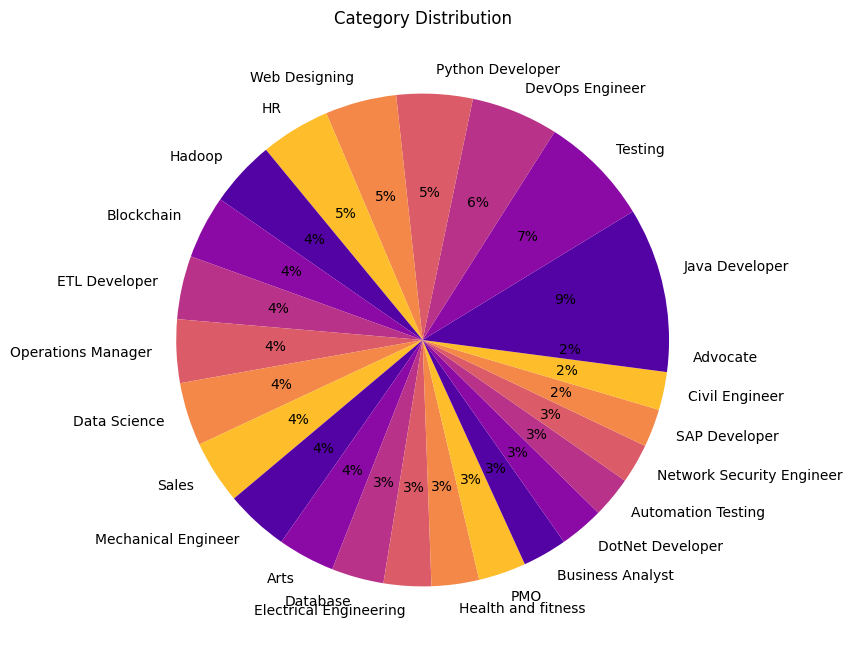

In [5]:
#piechart
plt.figure(figsize=(8,8))
plt.pie(category['Category'], labels=category['index'],
        colors=sns.color_palette('plasma'), autopct='%.0f%%')
plt.title('Category Distribution')
plt.show()

## Data Preprocessing

In [6]:
import re
def cleanResume(resumeText):
    resumeText = re.sub('http\S+\s*', ' ', resumeText)  # remove URLs
    resumeText = re.sub('RT|cc', ' ', resumeText)  # remove RT and cc
    resumeText = re.sub('#\S+', '', resumeText)  # remove hashtags
    resumeText = re.sub('@\S+', '  ', resumeText)  # remove mentions
    resumeText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', resumeText)
# remove punctuations
    resumeText = re.sub(r'[^\x00-\x7f]',r' ', resumeText)
    resumeText = re.sub('\s+', ' ', resumeText)  # remove extra whitespace
    return resumeText

In [7]:
# Create an empty list to store the cleaned resumes
cleaned_resumes = []
# Iterate over each row in the DataFrame
for index, row in df.iterrows():
    resume_text = row['Resume']  # Get the resume text from the 'Resume' column
    # Apply the cleanResume() function to preprocess the resume text
    cleaned_text = cleanResume(resume_text)
    # Append the cleaned text to the list of cleaned resumes
    cleaned_resumes.append(cleaned_text)
# Create a new 'cleaned' column in the DataFrame and assign the cleaned resumes
df['cleaned'] = cleaned_resumes
df.head()

,Category,Resume,cleaned
0,Data Science,Skills * Programming Languages: Python (pandas...,Skills Programming Languages Python pandas num...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,Education Details May 2013 to May 2017 B E UIT...
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",Areas of Interest Deep Learning Control System...
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,Skills R Python SAP HANA Tableau SAP HANA SQL ...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",Education Details MCA YMCAUST Faridabad Haryan...


In [8]:
#getting the entire resume text
corpus=" "
for i in range(0,len(df)):
    corpus= corpus+ df["cleaned"][i]

In [9]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
import string
from wordcloud import WordCloud

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [10]:
tokenizer = nltk.tokenize.RegexpTokenizer('\w+')
#Tokenizing the text
tokens = tokenizer.tokenize(corpus)
len(tokens)

411913

In [11]:
#now we shall make everything lowercase for uniformity
#to hold the new lower case words
words = []
# Looping through the tokens and make them lower case
for word in tokens:
    words.append(word.lower())
words[0:10]

['skills',
 'programming',
 'languages',
 'python',
 'pandas',
 'numpy',
 'scipy',
 'scikit',
 'learn',
 'matplotlib']

In [12]:
# Now encode the data
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
df['new_Category'] = label.fit_transform(df['Category'])
df.head(55)

,Category,Resume,cleaned,new_Category
0,Data Science,Skills * Programming Languages: Python (pandas...,Skills Programming Languages Python pandas num...,6
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,Education Details May 2013 to May 2017 B E UIT...,6
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",Areas of Interest Deep Learning Control System...,6
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,Skills R Python SAP HANA Tableau SAP HANA SQL ...,6
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",Education Details MCA YMCAUST Faridabad Haryan...,6
5,Data Science,"SKILLS C Basics, IOT, Python, MATLAB, Data Sci...",SKILLS C Basics IOT Python MATLAB Data Science...,6
6,Data Science,Skills â¢ Python â¢ Tableau â¢ Data Visuali...,Skills Python Tableau Data Visualization R Stu...,6
7,Data Science,Education Details \r\n B.Tech Rayat and Bahr...,Education Details B Tech Rayat and Bahra Insti...,6
8,Data Science,Personal Skills â¢ Ability to quickly grasp t...,Personal Skills Ability to quickly grasp techn...,6
9,Data Science,Expertise â Data and Quantitative Analysis â...,Expertise Data and Quantitative Analysis Decis...,6


In [13]:
# Vectorizing the cleaned columns
from sklearn.feature_extraction.text import TfidfVectorizer
text = df['cleaned'].values
target = df['new_Category'].values


word_vectorizer = TfidfVectorizer(sublinear_tf=True,stop_words='english',max_features=1500)
word_vectorizer.fit(text)
WordFeatures = word_vectorizer.transform(text)

In [14]:
WordFeatures.shape

(962, 1500)

In [15]:
print(WordFeatures)

  (0, 1497)	0.030442872257393377
  (0, 1484)	0.034531750632907525
  (0, 1482)	0.1138465211736939
  (0, 1460)	0.07093131129419672
  (0, 1451)	0.033309013428457386
  (0, 1442)	0.03203670321153616
  (0, 1440)	0.08546898208818157
  (0, 1439)	0.04080461724681855
  (0, 1436)	0.05680440806960008
  (0, 1420)	0.04659756799177676
  (0, 1419)	0.0503923714674369
  (0, 1389)	0.08368776039571268
  (0, 1388)	0.11957568503304351
  (0, 1382)	0.0636917041233275
  (0, 1376)	0.1487996917738002
  (0, 1371)	0.06899078914578757
  (0, 1365)	0.0531162184530022
  (0, 1364)	0.0815286030249583
  (0, 1362)	0.05813765391929385
  (0, 1358)	0.025538351209887553
  (0, 1344)	0.1499576218829958
  (0, 1343)	0.05681550781284476
  (0, 1309)	0.0646209141904646
  (0, 1299)	0.05319383005661842
  (0, 1286)	0.0346379947929267
  :	:
  (961, 336)	0.13437601229264157
  (961, 317)	0.06693311287776045
  (961, 315)	0.08639977563211801
  (961, 272)	0.025466251941105137
  (961, 258)	0.082314549875185
  (961, 243)	0.10857982774459495
  

## Train Test Data and Modeling

In [16]:
# Separate train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(WordFeatures, target, random_state=24, test_size=0.2)

In [17]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((769, 1500), (193, 1500), (769,), (193,))

In [18]:
# Model Training
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neighbors import KNeighborsClassifier
model = OneVsRestClassifier(KNeighborsClassifier())
model.fit(X_train, y_train)

OneVsRestClassifier(estimator=KNeighborsClassifier())

In [35]:
# Prediction
y_pred = model.predict(X_test)

In [36]:
print(f'---------------------------------\n| Training Accuracy   :- {(model.score(X_train, y_train)*100).round(2)}% |')
print(f'---------------------------------\n| Validation Accuracy :- {(model.score(X_test, y_test)*100).round(2)}% |\n---------------------------------')

---------------------------------
| Training Accuracy   :- 98.96% |
---------------------------------
| Validation Accuracy :- 96.89% |
---------------------------------


In [21]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00         6
           3       1.00      1.00      1.00         9
           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         3
           6       1.00      1.00      1.00         7
           7       1.00      1.00      1.00         6
           8       1.00      1.00      1.00        10
           9       1.00      1.00      1.00         6
          10       1.00      1.00      1.00        10
          11       1.00      1.00      1.00         8
          12       1.00      1.00      1.00         6
          13       1.00      1.00      1.00         6
          14       1.00      1.00      1.00         8
          15       1.00      1.00      1.00        16
          16       1.00      1.00      1.00         7
          17       1.00    

## To learn the top keywords to analyze.

In [22]:
#Stop words are generally the most common words in a language.
#English stop words from nltk.
stopwords = nltk.corpus.stopwords.words('english')
words_new = []
#Now we need to remove the stop words from the words variable
#Appending to words_new all words that are in words but not in sw
for word in words:
    if word not in stopwords:
        words_new.append(word)

In [23]:
words_new[0:5]

['skills', 'programming', 'languages', 'python', 'pandas']

In [24]:
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [25]:
# Perform Lemmatization
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
wn = WordNetLemmatizer()
lem_words=[]
for word in words_new:
    word=wn.lemmatize(word)
    lem_words.append(word)

[nltk_data] Downloading package wordnet to /root/nltk_data...


In [26]:
lem_words[0:5]

['skill', 'programming', 'language', 'python', 'panda']

In [27]:
same=0
diff=0
for i in range(0,1832):
    if(lem_words[i]==words_new[i]):
        same=same+1
    elif(lem_words[i]!=words_new[i]):
        diff=diff+1
print('Number of words Lemmatized=', diff)
print('Number of words not Lemmatized=', same)

Number of words Lemmatized= 294
Number of words not Lemmatized= 1538


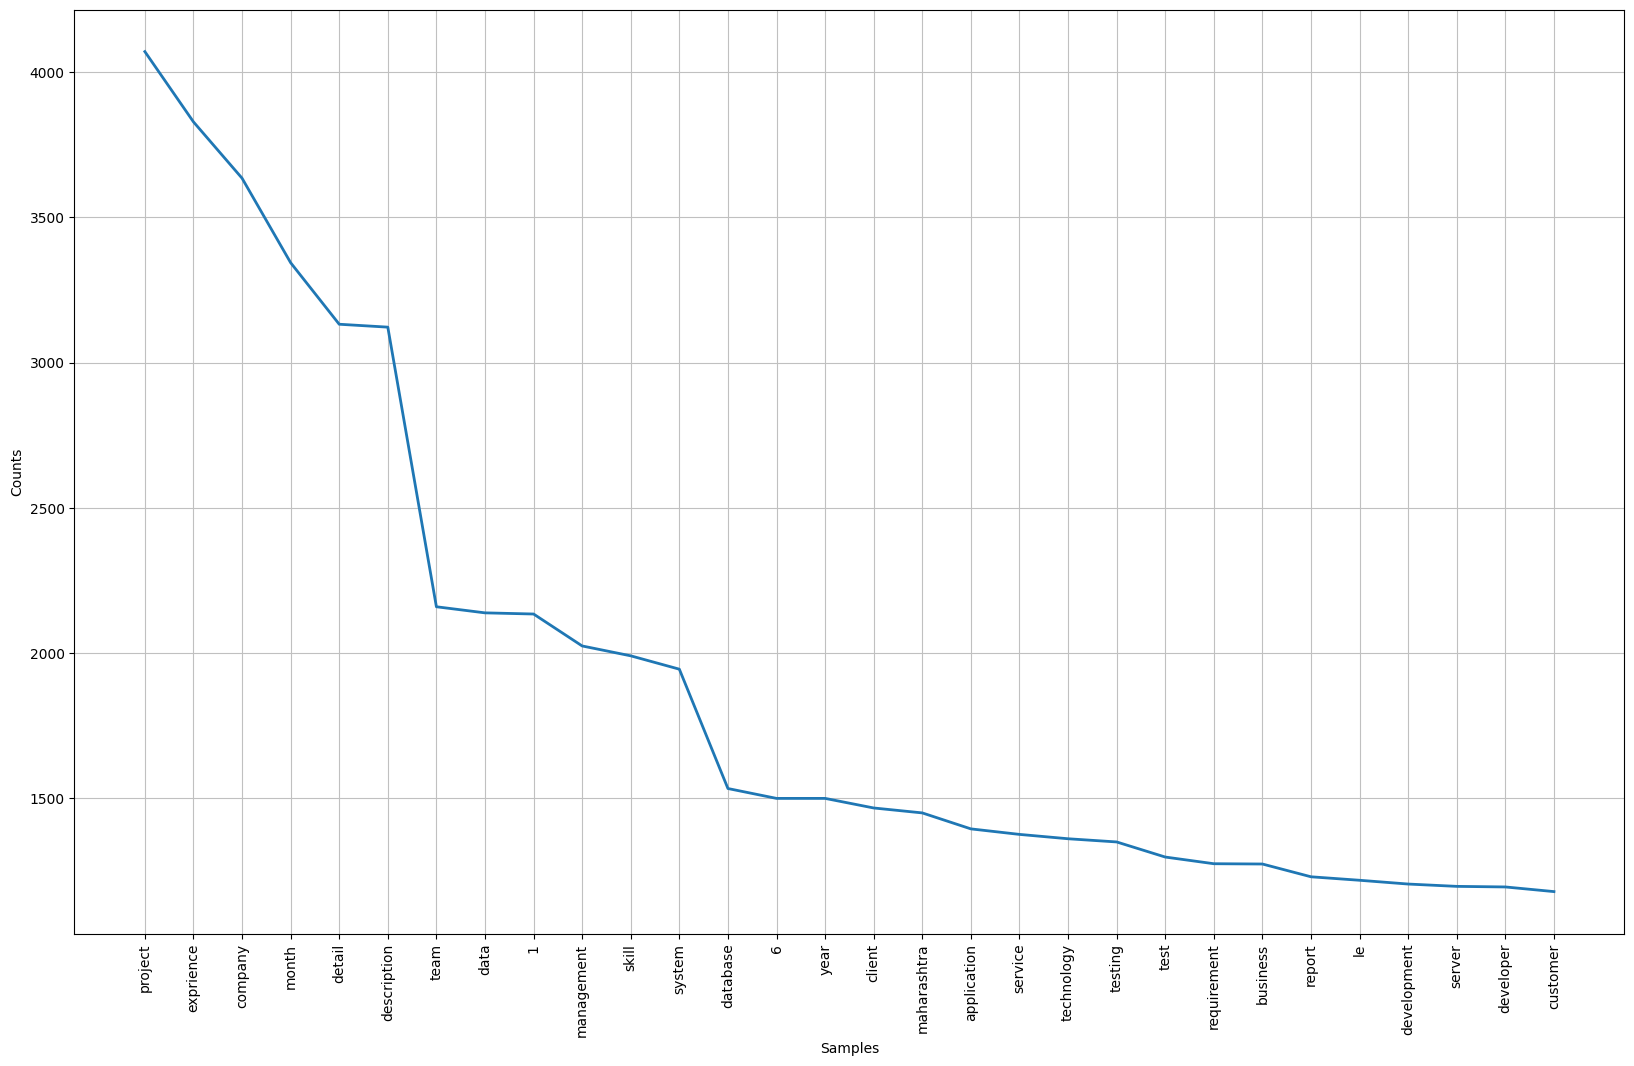

<Axes: xlabel='Samples', ylabel='Counts'>

In [28]:
#The frequency distribution of the words
freq_dist = nltk.FreqDist(lem_words)
#Frequency Distribution Plot
plt.subplots(figsize=(20,12))
freq_dist.plot(30)

In [29]:
# Now we generate wordcloud
res=' '.join([i for i in lem_words if not i.isdigit()])

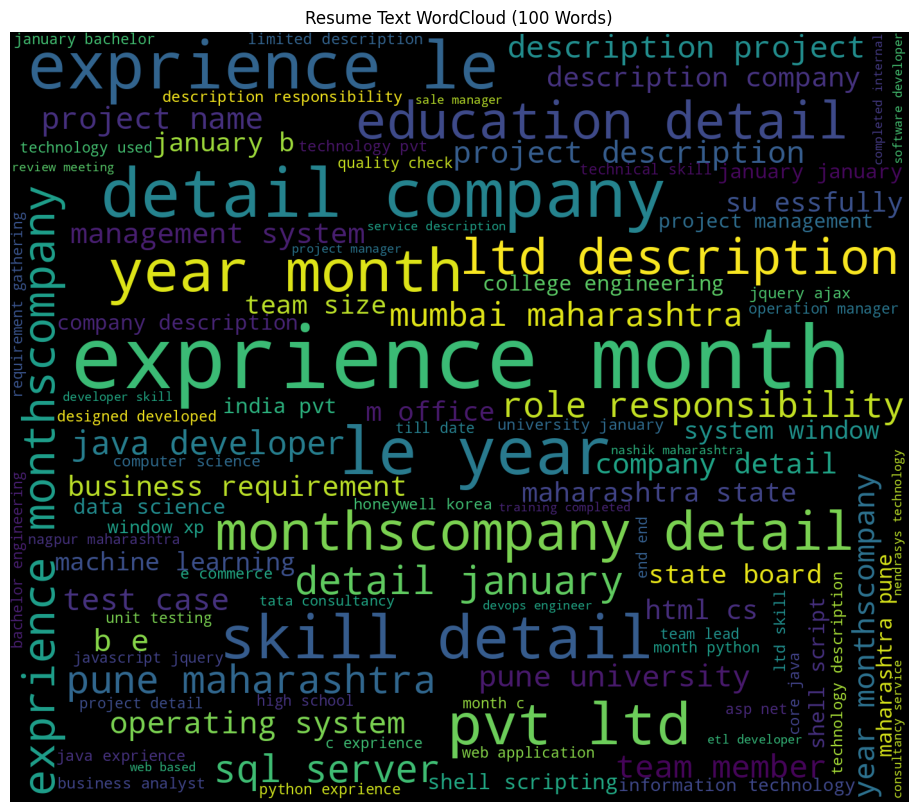

In [30]:
plt.subplots(figsize=(16,10))
wordcloud = WordCloud(background_color='black',max_words=100,width=1400,height=1200).generate(res)
plt.imshow(wordcloud)
plt.title('Resume Text WordCloud (100 Words)')
plt.axis('off')
plt.show()

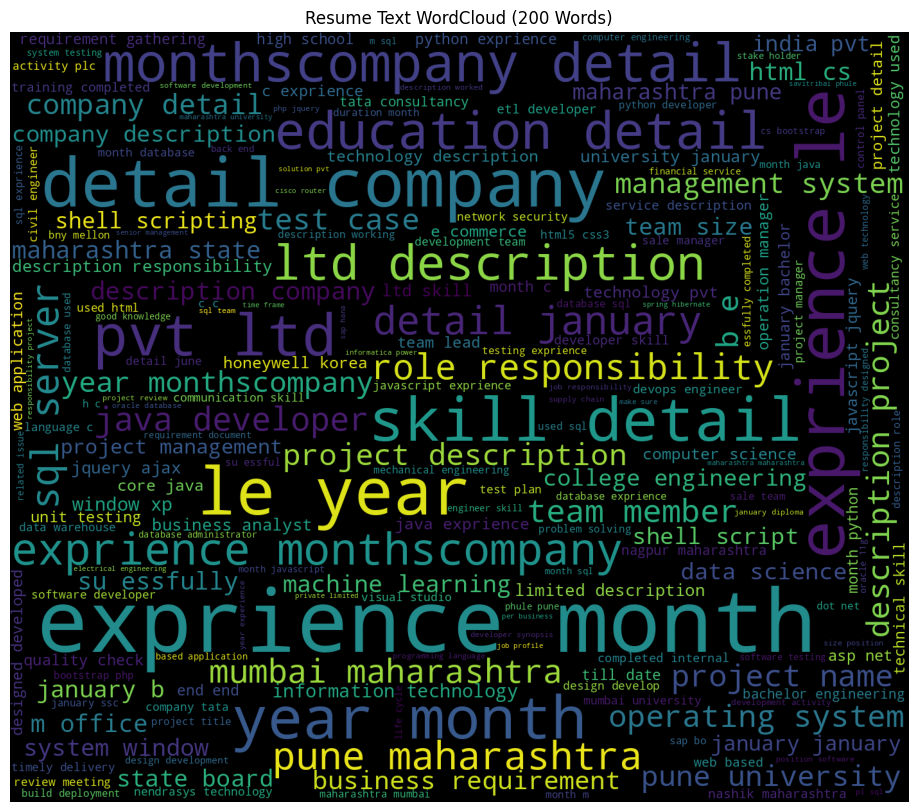

In [31]:
plt.subplots(figsize=(16,10))
wordcloud = WordCloud(background_color='black',max_words=200,width=1400,height=1200).generate(res)
plt.imshow(wordcloud)
plt.title('Resume Text WordCloud (200 Words)')
plt.axis('off')
plt.show()